<a href="https://colab.research.google.com/github/sriramreddy-7/J_Component_Project/blob/main/FMLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


In [2]:
data_dir = '/content/drive/MyDrive/J_CompAIML/DATASET/BTDS'
classes = ['BrainTumor', 'Healthy']
num_classes = len(classes)
img_size = (150,150)

In [40]:
X = []
y = []
X = []
y = []
for i in range(num_classes):
    path = os.path.join(data_dir, classes[i])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_array, (150, 150))
        X.append(img_resized)
        y.append(i)

In [41]:
print(X)
print(y)

[array([[4, 2, 1, ..., 0, 0, 0],
       [4, 2, 1, ..., 0, 0, 0],
       [4, 2, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[66, 65, 65, ..., 91, 92, 92],
       [64, 66, 66, ..., 91, 92, 92],
       [67, 66, 66, ..., 91, 92, 92],
       ..

In [42]:
X = np.array(X)
y = np.array(y)

In [43]:
print(X.shape,y.shape)

(4612, 150, 150) (4612,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **KNN**

In [68]:
clf = KNeighborsClassifier()
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
    

In [69]:
print('Accuracy:', acc_knn)

Accuracy: 0.8927410617551462


In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

## **SVM**-***Support Vector Machine***

In [48]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
     
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
y_pred = model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
  

In [50]:
print("Accuracy:", acc_svm)

Accuracy: 0.952329360780065


In [54]:
print("Accuracy:", round(acc_svm*100,4),"%")

Accuracy: 95.2329 %


In [55]:
cm_svm = confusion_matrix(y_test, y_pred)


In [56]:
print("Confusion Matrix:\n", cm_svm)

Confusion Matrix:
 [[494  26]
 [ 18 385]]


# **Decision-Tree**

In [58]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)

In [67]:
print('Accuracy:', acc_dt)
print('Accuracy Percentage:', round(acc_dt*100,3),"%")

Accuracy: 0.8970747562296858
Accuracy Percentage: 89.707 %


# **LogisticRegression**

In [19]:
from sklearn.linear_model import LogisticRegression

In [60]:
model_lgr = LogisticRegression()

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

model_lgr.fit(X_train_flat, y_train)


y_pred = model_lgr.predict(X_test_flat)


acc_lgr = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print('Accuracy:', acc_lgr)
print('Accuracy Percentage:',round(acc_lgr*100,3),"%")

Accuracy: 0.964245810055866
Accuracy Percentage: 96.425 %


# **Naive_Bayes_Classification**

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
model_nbc = GaussianNB()

model_nbc.fit(X_train, y_train)

y_pred = model_nbc.predict(X_test)

acc_nbc = accuracy_score(y_test, y_pred)

In [63]:
print(f"Accuracy: {acc_nbc}")

Accuracy: 0.570964247020585


In [64]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


data_dir = '/content/drive/MyDrive/J_CompAIML/DATASET/BTDS'
classes = ['BrainTumor', 'Healthy']
num_classes = len(classes)

X = []
y = []
for i in range(num_classes):
    path = os.path.join(data_dir, classes[i])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_array, (150, 150))
        X.append(img_resized)
        y.append(i)



In [30]:
print(X)
print(y)

[array([[4, 2, 1, ..., 0, 0, 0],
       [4, 2, 1, ..., 0, 0, 0],
       [4, 2, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[66, 65, 65, ..., 91, 92, 92],
       [64, 66, 66, ..., 91, 92, 92],
       [67, 66, 66, ..., 91, 92, 92],
       ..

In [31]:
X = np.array(X)
y = np.array(y)

In [32]:
print(X.shape,y.shape)

(4612, 150, 150) (4612,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train.reshape(X_train.shape[0], -1), y_train)



RandomForestClassifier(random_state=42)

In [70]:
y_pred = rfc.predict(X_test.reshape(X_test.shape[0], -1))

accuracy_rfc = (y_pred == y_test).mean()



In [71]:
print("Accuracy:", accuracy_rfc)

Accuracy: 0.9566630552546046


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [82]:
algorithms=['KNN','SVM','DecisionTree','Logistic','Naive_Bayes','Random Forest']
accuracy_list=[acc_knn,acc_svm,acc_dt,acc_lgr,acc_nbc,accuracy_rfc]

In [74]:
final_accuracy=[]
for i in accuracy_list:
  final_accuracy.append(i*100)

In [75]:
print(final_accuracy)

[89.27410617551462, 95.2329360780065, 89.70747562296857, 94.58288190682556, 57.0964247020585, 95.66630552546046]


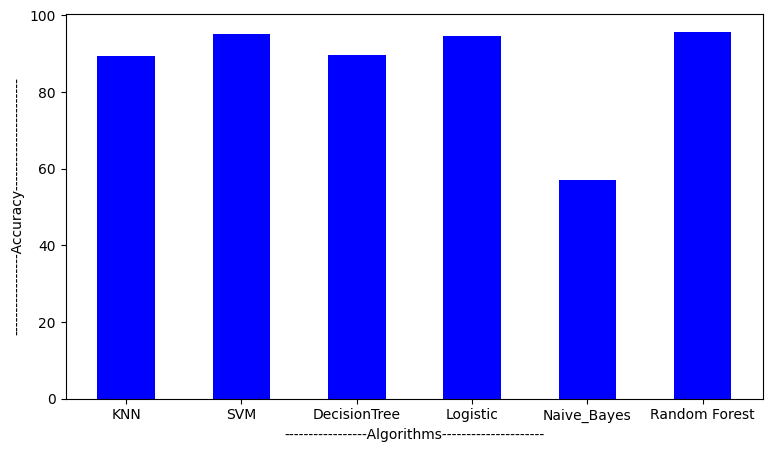

In [100]:
courses =algorithms
values = final_accuracy
fig = plt.figure(figsize = (9,5))
plt.bar(courses, values, color ='blue',width = 0.50)
plt.xlabel("-----------------Algorithms---------------------")
plt.ylabel("-----------------Accuracy-----------------------")
plt.show()